<center>
<img src="https://upload.wikimedia.org/wikipedia/fr/thumb/d/d9/Logo_Télécom_ParisTech.svg/1200px-Logo_Télécom_ParisTech.svg.png" width=150px/>
</center>

<h1></h1>
<h2><center>
<strong>
<font color="chillipepper">IGR 204 - Visualization </font>
</strong>
</center></h2>

<h2><center><font color="blue"><strong> Group Project: Implementation Git link </strong></font></center></h2>


## Exploration

In [45]:
import pandas as pd
import altair as alt

In [46]:
names = pd.read_csv('dpt2020.csv', sep=';')

In [47]:
names

,sexe,preusuel,annais,dpt,nombre
0,1,_PRENOMS_RARES,1900,02,7
1,1,_PRENOMS_RARES,1900,04,9
2,1,_PRENOMS_RARES,1900,05,8
3,1,_PRENOMS_RARES,1900,06,23
4,1,_PRENOMS_RARES,1900,07,9
...,...,...,...,...,...
3727548,2,ZYA,2018,59,3
3727549,2,ZYA,XXXX,XX,264
3727550,2,ZYNA,2013,93,3
3727551,2,ZYNA,XXXX,XX,59


In [48]:
names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3727553 entries, 0 to 3727552
Data columns (total 5 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   sexe      int64 
 1   preusuel  object
 2   annais    object
 3   dpt       object
 4   nombre    int64 
dtypes: int64(2), object(3)
memory usage: 142.2+ MB


In [49]:
names.describe()

,sexe,nombre
count,3.727553e+06,3.727553e+06
mean,1.535894e+00,2.323390e+01
std,4.987100e-01,8.047527e+01
min,1.000000e+00,3.000000e+00
25%,1.000000e+00,4.000000e+00
50%,2.000000e+00,7.000000e+00
75%,2.000000e+00,1.900000e+01
max,2.000000e+00,6.310000e+03


In [50]:
names.dpt.value_counts()

dpt
75    127100
59    103867
69     80879
13     79177
62     67952
       ...  
09     15305
05     14928
04     13286
23     12482
48     11099
Name: count, Length: 100, dtype: int64

In [51]:
names.drop(names[names.preusuel == '_PRENOMS_RARES'].index, inplace=True)
names.drop(names[names.dpt == 'XX'].index, inplace=True)

In [52]:
# Convert 'annais' to int
names['annais'] = names['annais'].astype(int)

## Sketch

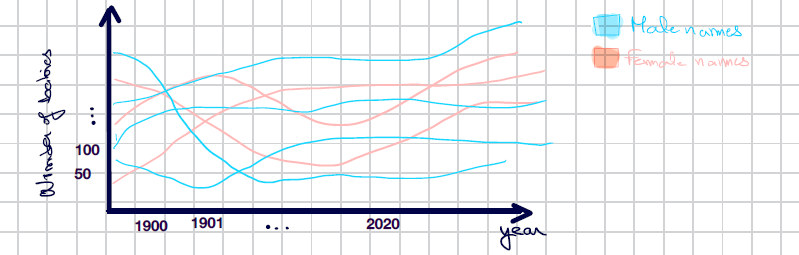

- This line chart tracks the popularity of male and female names over the years. Each line shows changes in a name's popularity, revealing long-term trends and fluctuations.

- It highlights the dynamic nature of name popularity, allowing for direct gender comaprisons

In [53]:
names.drop(names[names.preusuel == '_PRENOMS_RARES'].index, inplace=True)

In [54]:
# Convert 'annais' and 'nombre' to numeric
names['annais'] = pd.to_numeric(names['annais'], errors='coerce')
names['nombre'] = pd.to_numeric(names['nombre'], errors='coerce')

# Filter the data for the years 1990 to 2020
names = names[names['annais'].between(1990, 2020)]

# Identify the top 3 most popular male and female names across all years and departments
top_male_names = names[names['sexe'] == 1].groupby('preusuel')['nombre'].sum().nlargest(3).index.tolist()
top_female_names = names[names['sexe'] == 2].groupby('preusuel')['nombre'].sum().nlargest(3).index.tolist()
top_names = top_male_names + top_female_names

# Filter the data to include only the top names
names = names[names['preusuel'].isin(top_names)]

# Group the data by year, name, and gender, summing the occurrences
grouped_names = names.groupby(['annais', 'preusuel', 'sexe']).sum().reset_index()

# Map gender to readable format
grouped_names['sexe'] = grouped_names['sexe'].map({1: 'Male', 2: 'Female'})

# Create the line chart
chart = alt.Chart(grouped_names).mark_line().encode(
    x=alt.X('annais:O', title='Year'),
    y=alt.Y('nombre:Q', title='Number of Babies'),
    color=alt.Color('sexe:N', scale=alt.Scale(domain=['Male', 'Female'], range=['blue', 'pink']), title='Gender'),
    detail='preusuel:N',
    tooltip=['annais:O', 'preusuel:N', 'sexe:N', 'nombre:Q']
).properties(
    title='Popularity of Top 3 Male and Female Names Over the Years (1990-2020)',
    width=800,
    height=400
).interactive()

chart

c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

## Observations

The data includes the number of babies with specific names, categorized by year and gender. 
After filtering the data for the years 1990 to 2020 and summing the occurrences of names per year and gender, the code maps gender values to 'Male' and 'Female'. 
An Altair line chart is then created with the year on the x-axis and the number of babies on the y-axis, with separate colored lines for each gender (blue for males and pink for females).

## **More explorations...**

In [55]:
# Disable row limit
alt.data_transformers.disable_max_rows()
names['annais'] = pd.to_numeric(names['annais'], errors='coerce')

In [56]:
# Filter data for the years 1990, 1991, 1992, and 1993
years_to_study = [1990, 1991, 1992, 1993]
names_filtered = names[names['annais'].isin(years_to_study)]

# Group by year, name, sex, and department, then sum the counts
regional_names = names_filtered.groupby(['annais', 'preusuel', 'sexe', 'dpt']).nombre.sum().reset_index()

In [57]:
def create_year_chart(year):
    year_data = regional_names[regional_names['annais'] == year]
    
    bars_sorted = alt.Chart(year_data).mark_bar().encode(
        x=alt.X('preusuel:N', sort='-y', title='Name', axis=alt.Axis(labelAngle=-90)),
        y=alt.Y('nombre:Q', title='Number of Babies'),
        color=alt.Color('sexe:N', scale=alt.Scale(domain=[1, 2], range=['lightblue', 'lightcoral']), title='Gender'),
        tooltip=['annais', 'preusuel', 'nombre', 'dpt']
    ).properties(
        width=300,
        height=400
    ).transform_window(
        rank='rank(nombre)',
        sort=[alt.SortField('nombre', order='descending')]
    ).transform_filter(
        (alt.datum.rank <= 10)  
    )

    # Add text annotations
    text = bars_sorted.mark_text(
        align='center',
        baseline='bottom',
        dy=-5  # Adjust the position
    ).encode(
        text='nombre:Q'
    )

    # Combine bar chart and text
    final_chart = (bars_sorted + text).properties(
        title=f'Name Trends in {year}'
    )
    
    return final_chart

# Generate charts for the specified years
charts = [create_year_chart(year) for year in years_to_study]

# Combine all year charts horizontally
combined_charts = alt.hconcat(*charts).resolve_scale(
    y='shared'
)

# Display the combined chart
combined_charts.display()


c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\Moez\anaconda3\envs\Vis\lib\

alt.HConcatChart(...)

# Goal of the Combined Charts

The purpose of these combined charts is to analyze and visualize the naming trends for male and female babies in French departments over the years 1990, 1991, 1992 and 1993. By displaying the top 10 most popular names for each year, we aim to observe the changes in naming preferences over this period. 

The charts are designed to highlight the following aspects:
- **Popularity of Names**: By ranking the names based on the number of babies given each name, we can identify the most popular names for each year.
- **Gender Distribution**: The charts differentiate between male and female names using distinct colors, providing insights into gender-specific naming trends.
- **Temporal Trends**: By comparing the charts for different years side by side, we can easily spot any shifts or consistencies in naming patterns.


## **More explorations using bubble chart**

In [58]:
# Ensure first that 'annais' column is numeric
names['annais'] = pd.to_numeric(names['annais'], errors='coerce')

In [59]:

# Filter data for the year 2020
names_filtered = names[names['annais'] == 2020]

In [60]:
# Group by department and gender, then sum the counts
department_summary = names_filtered.groupby(['dpt', 'sexe']).nombre.sum().reset_index()

# Create the bubble chart
bubble_chart = alt.Chart(department_summary).mark_circle().encode(
    x=alt.X('dpt:N', title='Department'),
    y=alt.Y('nombre:Q', title='Number of Babies'),
    size=alt.Size('nombre:Q', title='Number of Babies', scale=alt.Scale(range=[10, 1000])),
    color=alt.Color('sexe:N', scale=alt.Scale(domain=[1, 2], range=['lightblue', 'lightcoral']), title='Gender'),
    tooltip=['dpt:N', 'nombre:Q', 'sexe:N']
).properties(
    title='Number of Babies by Gender in Each Department (2020)',
    width=1200,
    height=800
)

# Display the chart
bubble_chart.display()


c:\Users\Moez\anaconda3\envs\Vis\lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

# Explanation of the Bubble Chart
The primary purpose of this chart is to provide a clear and concise visualization of the distribution of births across different departments, allowing us to easily compare the number of male and female babies born in each department. This visualization can help identify patterns and trends in birth data by region and gender.

### Insights
By examining this chart, we can easily gain insights into:
- Which departments have the highest and lowest number of births.
- The distribution of male and female births across different departments.
- Any notable trends or disparities in the birth data by region and gender.